### Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from gensim.models import FastText
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading Models, Label Encoder and FastText Model

In [3]:
log_clf = joblib.load('../Models/log_model_bal.joblib')
xgb_clf = joblib.load('../Models/xgb_model_bal.joblib')
lgbm_clf = joblib.load('../Models/lgbm_model_bal.joblib')
le = joblib.load('../Models/label_encoder_bal.joblib')
ft_model = FastText.load('../Models/fasttext_model_bal.bin')

### Loading Test Data

In [5]:
X_test_ft = np.load('../Test Datasets/X_test_ft_bal.npy')
y_test = np.load('../Test Datasets/y_test_bal.npy', allow_pickle=True)
y_test = pd.Series(y_test)

### Generating Model Predicitions

In [6]:
log_pred = log_clf.predict(X_test_ft)
xgb_pred_enc = xgb_clf.predict(X_test_ft)
xgb_pred = le.inverse_transform(xgb_pred_enc)
lgbm_pred = lgbm_clf.predict(X_test_ft)

### Preparing Labels, Colormap and Model Dicitionary

In [7]:
labels = le.classes_
cmaps = {
    'Logistic Regression': 'Reds',
    'XGBoost': 'Blues',
    'LightGBM': 'Greens'
}

models = {
    'Logistic Regression': log_pred,
    'XGBoost': xgb_pred,
    'LightGBM': lgbm_pred
}

### Computing and Displaying Metrics and Showing Confusion Matrices

Logistic Regression:
Accuracy Score: 0.529308176100629
Precision Score (macro): 0.535627802698091
Recall Score (macro): 0.529308176100629
F1 Score (macro): 0.5308045520259201



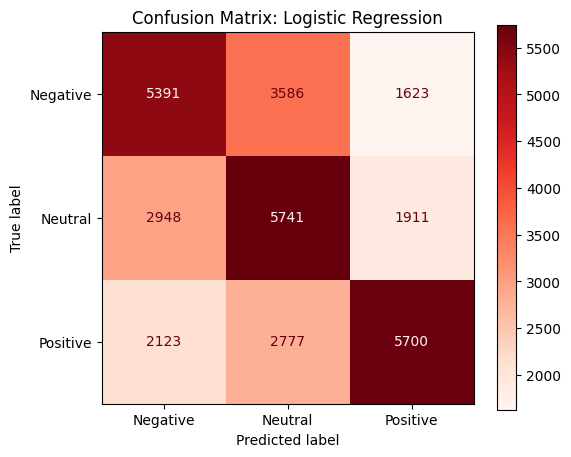

XGBoost:
Accuracy Score: 0.5964465408805032
Precision Score (macro): 0.5976496663071469
Recall Score (macro): 0.5964465408805032
F1 Score (macro): 0.5968671419057398



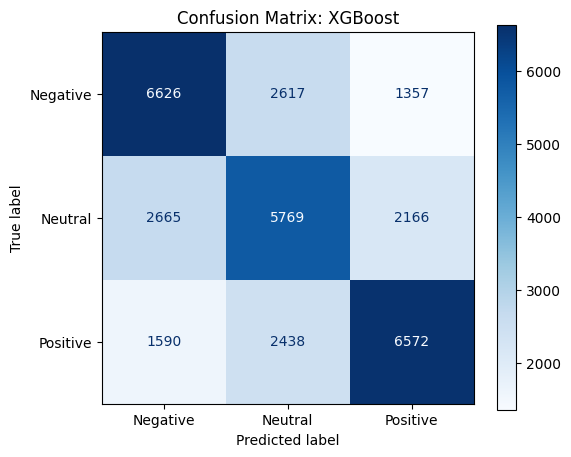

LightGBM:
Accuracy Score: 0.5526729559748428
Precision Score (macro): 0.560404684371323
Recall Score (macro): 0.5526729559748428
F1 Score (macro): 0.5544981915742574



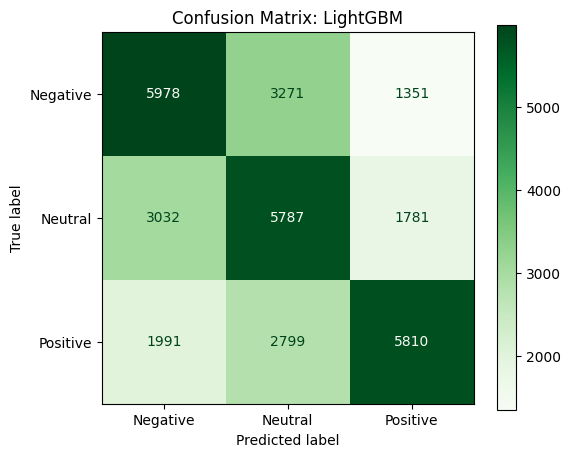

In [8]:
metric_dict = {}
for name, preds in models.items():
    print(f"{name}:")
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    print(f"Accuracy Score: {acc}")
    print(f"Precision Score (macro): {prec}")
    print(f"Recall Score (macro): {rec}")
    print(f"F1 Score (macro): {f1}")
    print()

    metric_dict[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    }

    cm = confusion_matrix(y_test, preds, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(cmap=cmaps[name], ax=ax, values_format='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

### Assembling and Displaying Final Metrics Table

In [9]:
metrics_df = pd.DataFrame(metric_dict).T
print("Performance Metrics Table:")
metrics_df

Performance Metrics Table:


,Accuracy,Precision,Recall,F1
Logistic Regression,0.529308,0.535628,0.529308,0.530805
XGBoost,0.596447,0.597650,0.596447,0.596867
LightGBM,0.552673,0.560405,0.552673,0.554498
